### About The Dataset
Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

### Tasks

* What types of crimes are most common?
* Where are different types of crimes most likely to occur?
* Does the frequency of crimes change over the day? Week? Year?


In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os, csv

In [2]:
pd.set_option("display.max_columns", 500)
dataset = pd.read_csv("dataset/crime.csv", encoding='latin-1')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [4]:
dataset.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


### Dataset cleaning

In [5]:
dataset.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [6]:
# Rename columns
rename = {
    'INCIDENT_NUMBER': 'incident_num',
    'OFFENSE_CODE':'code',
    'OFFENSE_CODE_GROUP':'code_group',
    'OFFENSE_DESCRIPTION':'description',
    'DISTRICT':'district',
    'REPORTING_AREA':'area',
    'SHOOTING':'shooting',
    'OCCURRED_ON_DATE':'date',
    'YEAR':'year',
    'MONTH':'month',
    'DAY_OF_WEEK':'day',
    'HOUR':'hour',
    'UCR_PART':'ucr_part',
    'STREET':'street',
    'Lat':'lat',
    'Long':'long',
    'Location':'location',
}

dataset.rename(columns=rename, inplace=True)

In [7]:
dataset.head()

,incident_num,code,code_group,description,district,area,shooting,date,year,month,day,hour,ucr_part,street,lat,long,location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [8]:
dataset['code_group'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
Drug Violation                               16548
Simple Assault                               15826
Vandalism                                    15415
Verbal Disputes                              13099
Towed                                        11287
Investigate Property                         11124
Larceny From Motor Vehicle                   10847
Property Lost                                 9751
Warrant Arrests                               8407
Aggravated Assault                            7807
Violations                                    6095
Fraud                                         5829
Residential Burglary                          5606
Missing Person Located                        4958
Auto Theft                     

In [9]:
dataset['ucr_part'].value_counts()

Part Three    158553
Part Two       97569
Part One       61629
Other           1232
Name: ucr_part, dtype: int64

In [10]:
dataset['year'].value_counts()

2017    100886
2016     99114
2018     65685
2015     53388
Name: year, dtype: int64

In [11]:
dataset['shooting'].isnull().sum()

318054

In [12]:
shooting = dataset['shooting'].copy()
shooting.fillna('N', inplace=True)
dataset['shooting'] = shooting

dataset['shooting'].head()

0    N
1    N
2    N
3    N
4    N
Name: shooting, dtype: object

In [13]:
ucr_part = dataset['ucr_part'].copy()
ucr_part.replace(to_replace='Other', value='Part Four', inplace=True)
dataset['ucr_part'] = ucr_part

In [14]:
dataset['ucr_part'].value_counts()

Part Three    158553
Part Two       97569
Part One       61629
Part Four       1232
Name: ucr_part, dtype: int64

In [15]:
dataset['ucr_part'].isnull().sum()

90

In [16]:
dataset[dataset['ucr_part'].isnull()]['code_group'].value_counts()

HOME INVASION                                77
HUMAN TRAFFICKING                             7
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Name: code_group, dtype: int64

In [17]:
code_group = dataset['code_group'].copy()
code_group.replace(to_replace="INVESTIGATE PERSON", value="Investigate Person", inplace=True)
dataset['code_group'] = code_group

In [18]:
dataset.loc[(dataset['code_group'] == 'Investigate Person') & (dataset['ucr_part'].isnull()), 'ucr_part']= "Part Three"

In [19]:
dataset['ucr_part'].isnull().sum()

86

In [20]:
dataset.dropna(subset=['ucr_part'], inplace=True)

In [21]:
dataset['code_group'].value_counts().head()

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18754
Other                              18075
Name: code_group, dtype: int64

In [22]:
order = dataset['code_group'].value_counts().head().index
order

Index(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other'],
      dtype='object')

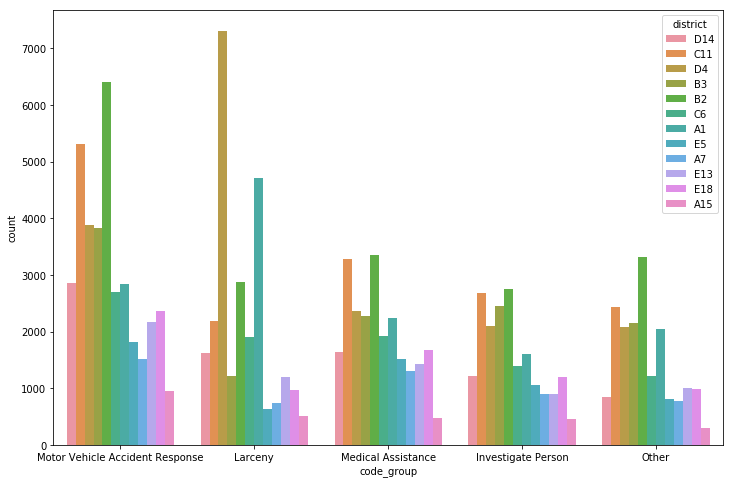

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(data=dataset, x='code_group', hue='district', order=order)

### some observation
* District B2 has worst driver with most accident
* District D4 has the worst theft

In [24]:
data2017 = dataset[dataset['year']==2017].groupby(['month','district']).count()
data2017

incident_num  code  code_group  description  area  shooting  \
month district                                                                
1     A1                 856   856         856          856   856       856   
      A15                152   152         152          152   152       152   
      A7                 355   355         355          355   355       355   
      B2                1228  1228        1228         1228  1228      1228   
      B3                 906   906         906          906   906       906   
      C11               1150  1150        1150         1150  1150      1150   
      C6                 561   561         561          561   561       561   
      D14                470   470         470          470   470       470   
      D4                1038  1038        1038         1038  1038      1038   
      E13                426   426         426          426   426       426   
      E18                462   462         462          462   462       462   
      E5                 358   358         358          358   358       358   
2     A1                 797   797         797          797   797       797   
      A15                139   139         139          139   139       139   
      A7                 310   310         310          310   310       310   
      B2                1125  1125        1125         1125  1125      1125   
      B3                 852   852         852          852   852       852   
      C11               1046  1046        1046         1046  1046      1046   
      C6                 465   465         465          465   465       465   
      D14                488   488         488          488   488       488   
      D4                 988   988         988          988   988       988   
      E13                424   424         424          424   424       424   
      E18                431   431         431          431   431       431   
      E5                 308   308         308          308   308       308   
3     A1                 829   829         829          829   829       829   
      A15                191   191         191          191   191       191   
      A7                 334   334         334          334   334       334   
      B2                1372  1372        1372         1372  1372      1372   
      B3                 929   929         929          929   929       929   
      C11               1093  1093        1093         1093  1093      1093   
...                      ...   ...         ...          ...   ...       ...   
10    C6                 693   693         693          693   693       693   
      D14                633   633         633          633   633       633   
      D4                1154  1154        1154         1154  1154      1154   
      E13                457   457         457          457   457       457   
      E18                465   465         465          465   465       465   
      E5                 368   368         368          368   368       368   
11    A1                 926   926         926          926   926       926   
      A15                179   179         179          179   179       179   
      A7                 333   333         333          333   333       333   
      B2                1231  1231        1231         1231  1231      1231   
      B3                 882   882         882          882   882       882   
      C11                999   999         999          999   999       999   
      C6                 510   510         510          510   510       510   
      D14                526   526         526          526   526       526   
      D4                 983   983         983          983   983       983   
      E13                436   436         436          436   436       436   
      E18                468   468         468          468   468       468   
      E5                 397   397         397          397   397 

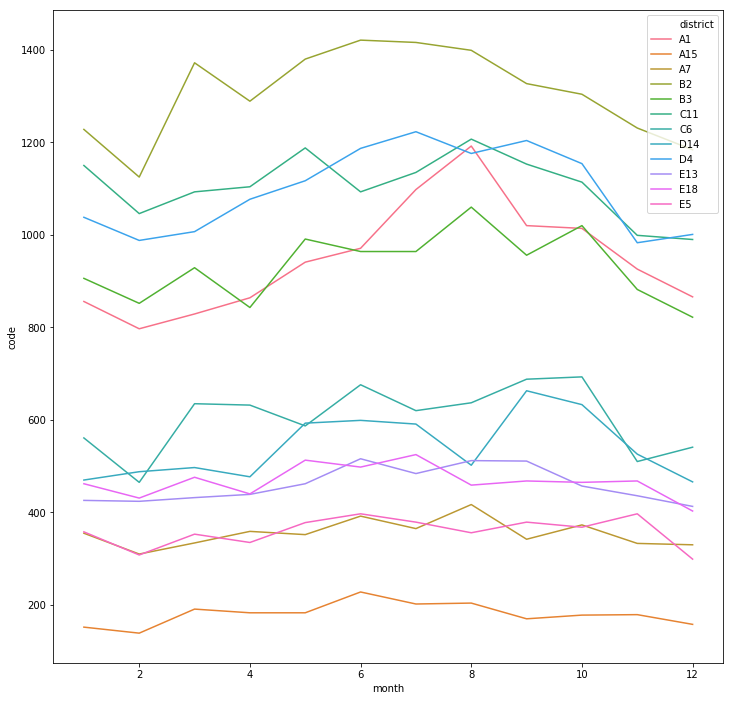

In [25]:
plt.figure(figsize=(12,12))
sns.lineplot(data=data2017.reset_index(), x='month', y='code', hue='district')

In [26]:
day_num_name = {'Monday':'1','Tuesday':'2','Wednesday':'3','Thursday':'4','Friday':'5','Saturday':'6','Sunday':'7',}
dataset['day_num'] = dataset['day'].map(day_num_name)

In [27]:
data_day_hour = dataset[dataset['year']==2017].groupby(['day_num','hour']).count()['code'].unstack()
data_day_hour

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day_num,,,,,,,,,,,,,,,,,,,,,,,,
1,609,344,255,185,119,119,208,425,612,645,781,718,820,795,788,790,962,1057,933,816,716,660,499,338
2,594,311,209,156,123,129,261,438,696,712,740,798,808,772,785,774,1006,1052,1024,830,733,632,566,393
3,640,331,250,134,138,157,253,445,698,756,798,840,911,791,821,784,984,986,927,876,695,650,527,436
4,608,372,234,174,141,154,271,444,637,719,818,812,881,822,762,830,986,967,940,772,693,680,548,476
5,723,385,283,155,124,146,254,445,632,759,832,820,928,806,814,828,997,1080,949,815,714,666,688,604
6,776,489,575,308,207,162,169,352,505,555,668,646,813,704,718,702,816,768,774,792,684,646,678,585
7,774,641,557,372,226,179,166,252,377,455,545,559,686,632,643,649,714,777,740,703,660,625,592,480


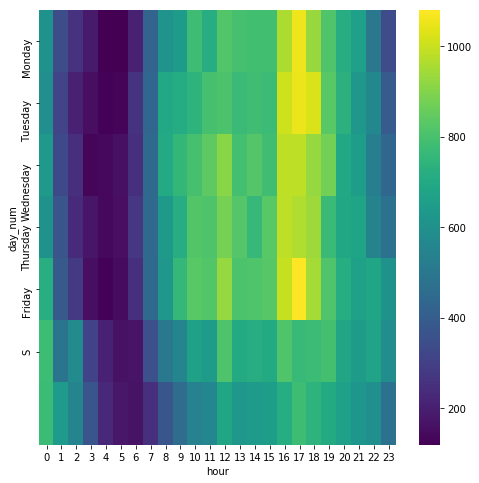

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(data=data_day_hour, cmap='viridis', yticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','S'])

* From `1am-7am` is the lowest incident rate and `4pm-6pm` is the highest.
* From `3am - 7pm` is the lowest incident rate and doesn't have the same sharp peak at `5pm` like the weekdays.
* Overall it looks like incidents are more prevalent during the week than during the weekend. 

In [29]:
df_day_hour_part1 = dataset[(dataset['year'] == 2017) & (dataset['code_group'] == 'Larceny')].groupby(['day_num','hour']).count()['code'].unstack()
df_day_hour_part1

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day_num,,,,,,,,,,,,,,,,,,,,,,,,
1,34,15,8,6,5,4,11,22,43,38,64,63,88,80,75,88,76,77,87,68,47,41,34,18
2,37,9,12,7,6,5,15,29,49,46,59,80,76,79,85,87,85,89,82,67,56,37,25,23
3,48,14,12,6,11,6,9,18,41,51,78,68,98,91,96,61,81,81,82,65,43,46,23,21
4,43,12,13,6,8,9,14,18,38,48,80,56,86,101,82,87,79,77,84,54,48,37,24,26
5,46,17,13,6,6,8,10,18,35,58,73,76,86,88,80,80,90,91,82,62,58,42,39,28
6,42,24,16,16,8,7,9,13,43,36,69,60,85,67,73,65,82,79,71,82,45,38,34,39
7,53,39,24,13,6,9,7,13,32,45,40,37,79,69,64,81,66,89,68,45,36,33,22,25


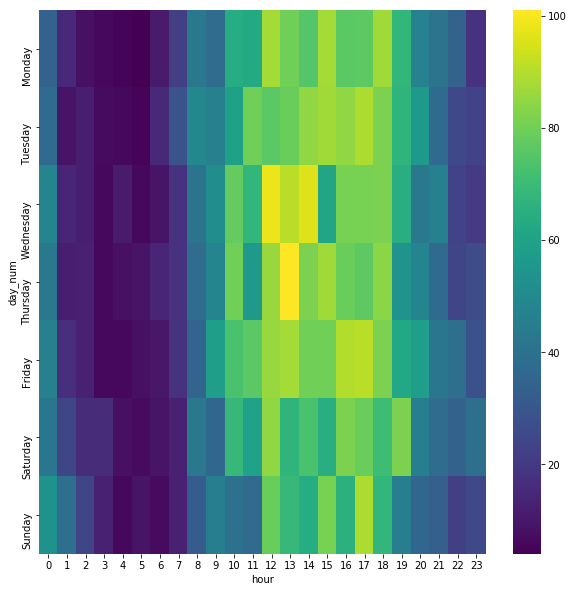

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df_day_hour_part1, cmap='viridis', yticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

* As we can see, theft usually happens in the middle of the day when people are working.
* The middle of the week seems to hold the highest peak.

In [31]:
dfpart1 = dataset[(dataset['year'] == 2017) & (dataset['ucr_part'] == 'Part One')].groupby(['code_group','shooting']).count().reset_index().sort_values('code',ascending=False)
dfpart2 = dataset[(dataset['year'] == 2017) & (dataset['ucr_part'] == 'Part One') & (dataset['shooting'] == 'Y')].groupby(['code_group','shooting']).count().reset_index().sort_values('code',ascending=False)

In [32]:
order1 = dataset[dataset['ucr_part'] == 'Part One']['code_group'].value_counts().head()
order1

Larceny                       25935
Larceny From Motor Vehicle    10847
Aggravated Assault             7807
Residential Burglary           5606
Auto Theft                     4851
Name: code_group, dtype: int64

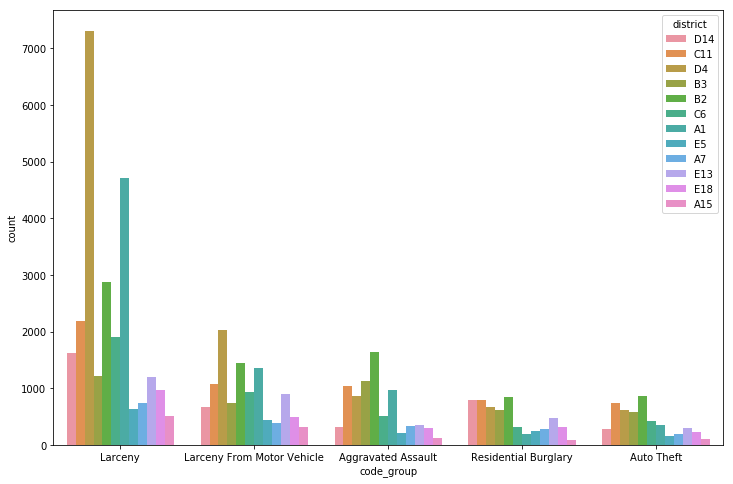

In [33]:
order1 = dataset[dataset['ucr_part'] == 'Part One']['code_group'].value_counts().head(5).index
plt.figure(figsize=(12,8))
sns.countplot(data = dataset, x='code_group',hue='district', order = order1)

In [34]:
order2 = dataset[dataset['ucr_part'] == 'Part Two']['code_group'].value_counts().head()
order2

Other             17089
Drug Violation    16548
Simple Assault    15826
Vandalism         15415
Violations         6095
Name: code_group, dtype: int64

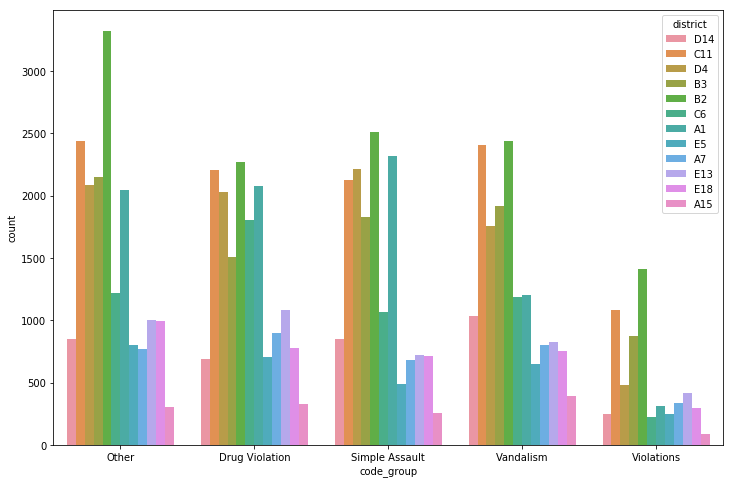

In [35]:
order2 = dataset[dataset['ucr_part'] == 'Part Two']['code_group'].value_counts().head(5).index
plt.figure(figsize=(12,8))
sns.countplot(data = dataset, x='code_group',hue='district', order = order2)

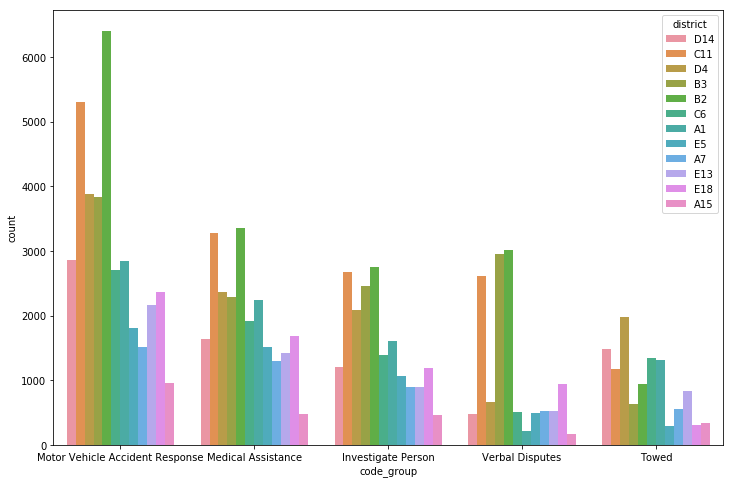

In [36]:
order3 = dataset[dataset['ucr_part'] == 'Part Three']['code_group'].value_counts().head().index
plt.figure(figsize=(12,8))
sns.countplot(data = dataset, x='code_group',hue='district', order = order3)


[Text(0, 0, 'Larceny'),
 Text(0, 0, 'Larceny From Motor Vehicle'),
 Text(0, 0, 'Aggravated Assault'),
 Text(0, 0, 'Residential Burglary'),
 Text(0, 0, 'Auto Theft'),
 Text(0, 0, 'Robbery'),
 Text(0, 0, 'Commercial Burglary'),
 Text(0, 0, 'Other Burglary'),
 Text(0, 0, 'Homicide')]

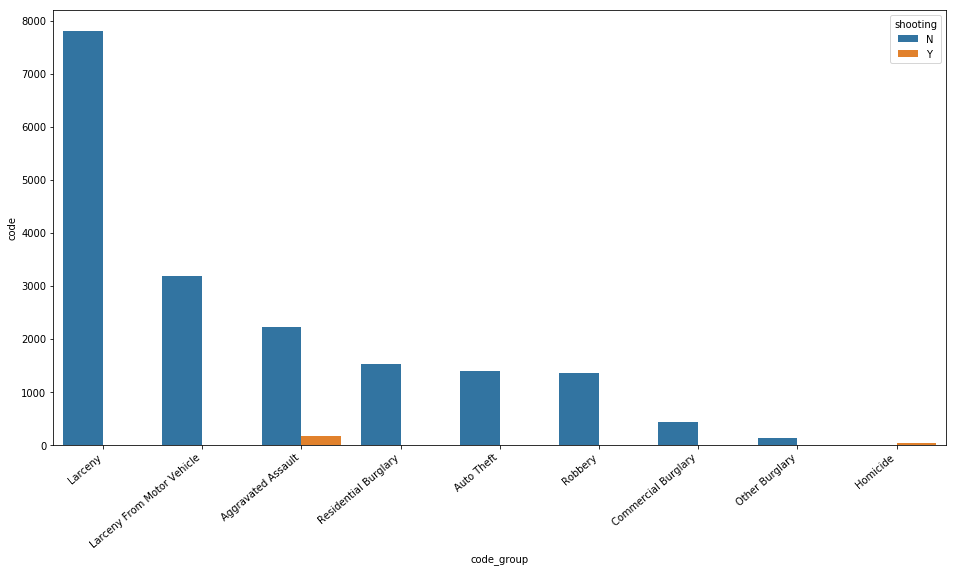

In [37]:
plt.figure(figsize=(16,8))
plt.tight_layout()
sns.set_color_codes("pastel")
ax = sns.barplot(y="code", x="code_group", data=dfpart1, hue='shooting')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#### What types of crimes are most common?
* Most common incident - Motor Vehicle Response
* Most common crimes - Larceny and Larceny from Motor Vehicle

#### Where are different types of crimes most likely to occur? 
* UCR 1 (worst crimes) happen mostly in D4